In [359]:
#pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import yfinance as yf
from pypfopt import expected_returns, risk_models, CovarianceShrinkage 
from pypfopt.efficient_frontier import EfficientFrontier

### Outline

- **Data Analysis Basics**
- **Data Manipulation**
- **String**
- **Filter**
- **Indexing**
- **Dealing with NA**
- **Reshape**
- **Combine Dataframe**
- **Sorting**
- **Groupby**
- **Time Series**
- **Data Visualization**
- **Statistical Analysis**

Links
- Pandas documentation: https://pandas.pydata.org/docs/reference/general_functions.html
- W3School - Python Tutorial: https://www.w3schools.com/python/default.asp
- RealPython - Using Python for Data Analysis: https://realpython.com/python-for-data-analysis/

**Data Analysis Basics**

Read files

`pd.read_csv`(filepath_or_buffer, sep=’ ,’ , header=’infer’,  index_col=None, usecols=None, engine=None, skiprows=None, nrows=None) 
- filepath_or_buffer: Location of the csv file. It accepts any string path or URL of the file.
- sep: It stands for separator, default is ‘, ‘.
- header: It accepts int, a list of int, row numbers to use as the column names, and the start of the data. Default display the first column as 0
- usecols: Retrieves only selected columns from the CSV file.
- nrows: Number of rows to be displayed from the dataset.
- index_col: If None, there are no index numbers displayed along with records.  
- skiprows: Skips passed rows in the new data frame.

`pd.read_excel`(io, sheet_name=0, header=0, index_col=None, usecols=None, nrows=None, engine=None)
- io: any valid string path is acceptable. Valid URL schemes include http, ftp, s3, and file
- sheet_name: strings/integers are used for sheet names/positions; lists are used to request multiple sheets; specify None to get all worksheets.
- header: row (0-indexed) to use for the column labels. Pass a listfor  MultiIndex; use None if there is no header
- index_col: column (0-indexed) to use as the row labels of the DataFrame; int, str, list of int, default None
- usecols: returns a subset of the columns based on str or list
- nrows: number of rows to parse
- engine: if io is not a buffer or path, this must be set to identify io. 'openpyxl' supports newer Excel file formats

Read multiple files with `for` loop (with pattern)
- base_url = "...."
- dfs = []
- for i in range(75):
    - dfs.append(base_url + str(i) + ".csv")

Some setups after reading a file
- df = pd.read_excel("Data.xlsx", sheet_name="sheet1")
- df.columns = ['col1, col2, ...]
- df.set_index('Date', inplace=True)
- df.index = pd.to_datetime(asset_raw.index)
- df.rename(columns={'xxx': 'yyy', ...}, inplace=True)
- df.round({"xxx":1, "yyy":2, ...})
- df.drop_duplicates(subset=None/['col1','col2',...], keep=’first’/'False', inplace=False)

Some ways to quick browse a large dataset

- `df.info()` prints everything
- `df.describe()` prints the statistical summary of the dataset
- `df.shape` prints the number of rows and columns
- `list(df.columns)` prints all the column names
- `df.loc[1,:]` prints the first observation of all the column
- `df.describe()` prints the descriptive statistics
- for col in pool.columns[x:y]: ~ print(col,":",df[col].nunique())

**Data Manipulation**

Change values in a DataFrame: `df.loc[index, column] = value`

`df.assign()` assign new columns to a DataFrame

In [402]:
df_assign = pd.DataFrame({'temp_c': [17.0, 25.0]}, index=['Portland', 'Berkeley'])
df_assign.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32, temp_k=lambda x: (x['temp_f'] + 459.67) * 5 / 9)

,temp_c,temp_f,temp_k
Portland,17.0,62.6,290.15
Berkeley,25.0,77.0,298.15


`df['col'].rank(method='dense/first/average/max',ascending=False)`: computes numerical data ranks (1 through n) along axis

In [406]:
df['GDP_rank'] = df['GDP'].rank(method='dense',ascending=False)
df.sort_values('GDP',ascending=False)

,year,country,GovExpend,Consumption,Exports,Imports,GDP,eval_NX,eval_C/GDP,GDP_tier,GDP_rank
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894,-0.524181,0.679416,tier3,1.0
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053,-0.513903,0.679416,tier3,2.0
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436,0.181161,0.560558,tier1,3.0
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095,0.177609,0.560558,tier1,4.0
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958,-0.055326,0.651703,tier1,5.0
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900,-0.054242,0.651703,tier1,6.0
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814,-0.031001,0.571383,tier1,7.0
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543,-0.030393,0.571383,tier1,8.0


Pandas Aggregation
- Built-in aggregations: `mean`, `var`, `std`, `min`, `median`, `max`, ...
- If aggregate all columns(entire df) that contain str, use `____(numeric_only=True)`
- The aggregation’s default is to aggregate each column (`axis=0`)
- By using the `axis=1` argument, you can do aggregations by row
- Custome Aggregation: write a Python function that takes a Series as an input and **outputs a single value**, then call the `agg` method

In [55]:
data = {
    "NorthEast": [5.9,  5.6,  4.4,  3.8,  5.8,  4.9,  4.3,  7.1,  8.3,  7.9,  5.7],
    "MidWest": [4.5,  4.3,  3.6,  4. ,  5.7,  5.7,  4.9,  8.1,  8.7,  7.4,  5.1],
    "South": [5.3,  5.2,  4.2,  4. ,  5.7,  5.2,  4.3,  7.6,  9.1,  7.4,  5.5],
    "West": [6.6, 6., 5.2, 4.6, 6.5, 5.5, 4.5, 8.6, 10.7, 8.5, 6.1],
    "National": [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
}

Urate = pd.DataFrame(data, index=range(1995,2017,2))

def high_or_low(s):
    return "Low" if s.mean() < 6.5 else "High"

Urate.agg(["mean", high_or_low])

,NorthEast,MidWest,South,West,National
mean,5.790909,5.636364,5.772727,6.618182,5.972727
high_or_low,Low,Low,Low,High,Low


In [17]:
Urate.mean(axis=1)

1995    5.58
1997    5.28
1999    4.34
2001    4.12
2003    5.90
2005    5.32
2007    4.52
2009    7.84
2011    9.18
2013    7.84
2015    5.62
dtype: float64

(Series).`dtype` ; (DataFrame).`dtypes` ; `type`(Series/DataFrame)

Pandas Transformation
- Built-in transformations: `cum(sum|min|max|prod)`,`diff`, `+,-,*,/`, `pct_change`, `value_counts`, `abs`...
- Two main types of transformation:
    - Series transforms: Series => Series; index of input/output can be different
    - Scalar transforms: single value => single value
- Custom Series Transforms: write a Python function that **takes a Series and outputs a new Series**, then pass our new function as an argument to the `apply` or `transform` method
- Custom Scalar Transforms: define a Python function that **takes in a scalar and produces a scalar**, then pass this function as an argument to the `applymap` Series or DataFrame method.
- Lambda Transformation: `function_lambda = lambda x: (sth related to x)`, then pass by `applymap`

In [25]:
def standardize_data(x):
    mu = x.mean()
    std = x.std()
    return (x - mu)/std

Urate.apply(standardize_data)

,NorthEast,MidWest,South,West,National
1995,0.074522,-0.663809,-0.294297,-0.009502,-0.230264
1997,-0.130414,-0.780639,-0.356552,-0.323057,-0.415598
1999,-0.950160,-1.189546,-0.979103,-0.741130,-1.033379
2001,-1.360033,-0.955885,-1.103613,-1.054685,-1.095157
2003,0.006210,0.037173,-0.045276,-0.061761,-0.106708
2005,-0.608599,0.037173,-0.356552,-0.584352,-0.415598
2007,-1.018472,-0.430148,-0.916848,-1.106944,-0.848044
2009,0.894269,1.439138,1.137570,1.035681,1.128854
2011,1.714015,1.789629,2.071397,2.133124,1.931969
2013,1.440766,1.030231,1.013060,0.983422,1.252410


In [30]:
def urate_classifier(ur):
    if ur > 6.5:
        return "high"
    elif ur > 4.5:
        return "medium"
    else:
        return "low"
    
Urate_classified = Urate.applymap(urate_classifier)
Urate_classified

,NorthEast,MidWest,South,West,National
1995,medium,low,medium,high,medium
1997,medium,low,medium,medium,medium
1999,low,low,low,medium,low
2001,low,low,low,medium,low
2003,medium,medium,medium,medium,medium
2005,medium,medium,medium,medium,medium
2007,low,medium,low,low,medium
2009,high,high,high,high,high
2011,high,high,high,high,high
2013,high,high,high,high,high


In [28]:
Urate.applymap(lambda x: math.log(x))

,NorthEast,MidWest,South,West,National
1995,1.774952,1.504077,1.667707,1.887070,1.722767
1997,1.722767,1.458615,1.648659,1.791759,1.667707
1999,1.481605,1.280934,1.435085,1.648659,1.458615
2001,1.335001,1.386294,1.386294,1.526056,1.435085
2003,1.757858,1.740466,1.740466,1.871802,1.757858
2005,1.589235,1.740466,1.648659,1.704748,1.667707
2007,1.458615,1.589235,1.458615,1.504077,1.526056
2009,1.960095,2.091864,2.028148,2.151762,2.054124
2011,2.116256,2.163323,2.208274,2.370244,2.208274
2013,2.066863,2.001480,2.001480,2.140066,2.079442


`df.T`(transpose): switch row/col for plotting

<Axes: >

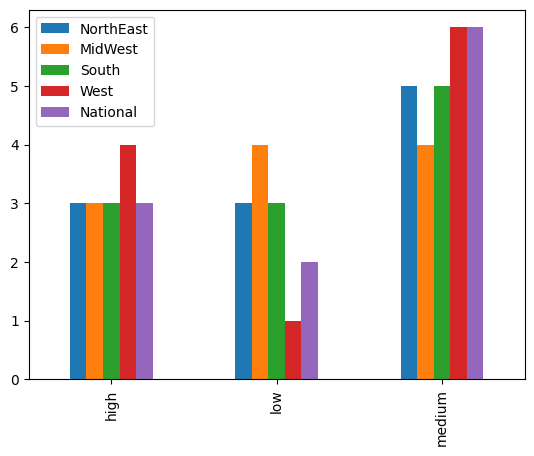

In [37]:
Urate_classified.apply(pd.Series.value_counts).plot(kind="bar")

<Axes: >

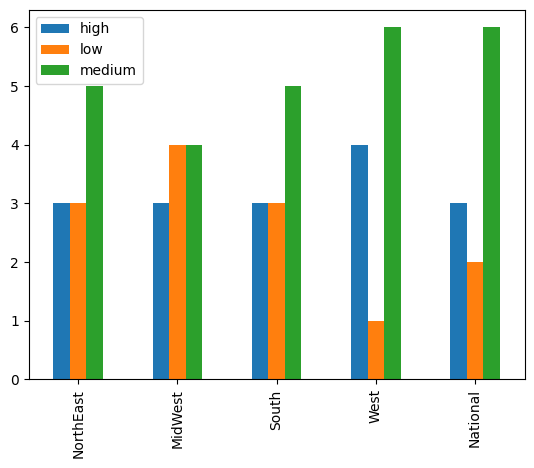

In [73]:
Urate_classified.apply(pd.Series.value_counts).T.plot(kind="bar")

Pandas Automatic Alignment

For all (row, column) combinations that appear in two DataFrames, the value of df_1+2, where we use df1 + df2, is equal to df1.loc[row, col] + df2.loc[row, col]. This happened even though the rows and columns were not in the same order, or different index.

In [157]:
data = {
    "year": [2010,2010,2010,2010],
    "country": ['Canada', 'Germany', 'United Kingdom', 'United States'],
    "GovExpend": [0.347331886872437, 0.6533862635593669, 0.52114611245523, 2.510143],
    "Consumption": [0.921951518090644, 1.91548065607022, 1.59856306771431, 10.185836],
    "Exports": [0.469948563365056, 1.4437352334151798, 0.690823962580302, 1.84628],
    "Imports": [0.500341353329594, 1.26612594055575, 0.74506549584434, 2.360183],
    "GDP": [1.6135428125893898, 3.41709456264895, 2.45289966512447, 14.992052727]
}
df = pd.DataFrame(data)

df1 = df.copy()
df1["year"] = df["year"]+1
for col in df.columns[2:]:
    df1[col] = df[col]*1.02

df = pd.concat([df,df1])
df

,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


`eval` in Pandas: evaluate a Python expression as a string
- supporting arithmetic operations: `+`,`-`,`*`,`/`,`**`,`%`,`//`
- supporting boolean operations: `|/or`, `&/and`, `~/not`


In [199]:
df["eval_NX"] = df.eval("Exports-Imports")
df["eval_C/GDP"] = df.eval("Consumption/GDP")
df

,year,country,GovExpend,Consumption,Exports,Imports,GDP,eval_NX,eval_C/GDP
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543,-0.030393,0.571383
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095,0.177609,0.560558
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900,-0.054242,0.651703
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053,-0.513903,0.679416
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814,-0.031001,0.571383
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436,0.181161,0.560558
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958,-0.055326,0.651703
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894,-0.524181,0.679416


Create categorical variables
- Use `pd.cut(...)`: when you need to segment and sort data values into bins
- Use `pd.get_dummies(...)` to create dummy variables

In [376]:
df['GDP_tier'] = pd.cut(df['GDP'],3, labels=['tier1','tier2','tier3'])

,year,country,GovExpend,Consumption,Exports,Imports,GDP,eval_NX,eval_C/GDP,GDP_tier
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543,-0.030393,0.571383,tier1
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095,0.177609,0.560558,tier1
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900,-0.054242,0.651703,tier1
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053,-0.513903,0.679416,tier3
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814,-0.031001,0.571383,tier1
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436,0.181161,0.560558,tier1
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958,-0.055326,0.651703,tier1
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894,-0.524181,0.679416,tier3


In [378]:
pd.get_dummies(df['year'],drop_first=True)

,2011
0,False
1,False
2,False
3,False
0,True
1,True
2,True
3,True


**String**

- `" ".join.(string_list)`: concates the strings in the list
- `str.replace("old","new")`: convert texts
- `str.__contains__("text")` or `"text" in str` or `str.find("text")`: check whether contain texts
- `str.upper()/lower()`: can use before `str.contain()`
- `str.count("text")`: count for number of texts appeared
- `str.len()`: number of charactors in the texts
- `str.strip()`: clean leading or trailing whitespace, especially useful in df.index/columns
- `str.split("text")`: split the elements in text into lists, or can `expand=True` into seperate columns

In [373]:
string_list = ["Liquid", "Alternative(alt)", "Funds"]
" ".join(string_list)

'Liquid Alternative(alt) Funds'

In [85]:
string = "Liquid Alternative(alt) Funds"
string.replace('(alt)','')

'Liquid Alternative Funds'

In [96]:
df['country'].apply(lambda i: i.replace('United',''))

0      Canada
1     Germany
2     Kingdom
3      States
0      Canada
1     Germany
2     Kingdom
3      States
Name: country, dtype: object

In [84]:
"alt" in string

True

In [85]:
string.upper().__contains__("ALT")

True

In [88]:
string.count('alt')

1

In [92]:
string_space = "    Liquid Alternative(alt) Funds  "
string_space.strip()

'Liquid Alternative(alt) Funds'

In [98]:
print(string.split(" "))
print(string.split('(alt)'))

['Liquid', 'Alternative(alt)', 'Funds']
['Liquid Alternative', ' Funds']


Simple string formatting :
- Syntax: `template.format(p1, p1, .... , k1=v1, k2=v2)`
- ...where "template" is a string containing format codes, and "format" uses it's argument to substitute value for each format codes

Complex string formatting :
- Syntax: `{[argument_index_or_keyword]:[width][.precision][type]}`
- The type can be used with format codes: `d`(integers), `f`(floating numbers), `b`(binary numbers), `s`(string)...
- Can use `%` operator instead of `format()`, or alternatively, can use `f"{47:,d}, {23.56984:,.2f}"`

Apply to :
- Dataframe: eg. `df.applymap(lambda x: '{:.1f}%'.format(x))`
- All float_format: `pd.set_option('display.float_format', lambda x: f"{x:,.2f}")`

In [204]:
'Sam has {0} red balls and {1} yellow balls'.format(12, 31)

'Sam has 12 red balls and 31 yellow balls'

In [205]:
"{0:s} {1:o} {2:.2f} {3:d}".format("Hello", 71, 45836.12589, 45)

'Hello 107 45836.13 45'

In [206]:
"%s %o %.2f %d" % ("Hello", 71, 45836.12589, 45)

'Hello 107 45836.13 45'

In [207]:
f"{47:,d}, {23.56984:,.2f}"

'47, 23.57'

**Filtering**

Boolean multiple conditions in Pandas
- `and`: (bool_series1) `&` (bool_series2)
- `or`: (bool_series1) `|` (bool_series2)
- `any`: returns True whenever at least one of the inputs are True 
- `all`: is True only when all the inputs are True.
- check for fixed values: `df.isin([value1, value2,...])`

In [216]:
high = Urate > 6.5
all_high = high.all(axis=1)
msg = "Out of {} months, {} had high unemployment across all states"
print(msg.format(len(all_high), all_high.sum()))

Out of 11 months, 3 had high unemployment across all states


Express columns in Pandas
- df.column_name
- df[columm_name]
- df.loc[:,"column_name"]

Some ways to filter a DataFrame

- `df.filter()` is used to Subset rows or columns of dataframe according to labels in the specified index
- `df[ (df['col_name'] > value) & (df.col_name == 'string') ]`: select rows based on boolean condition(s)
- `df[ ( df['col_name].str.contains('J') ) | ( df.col_name.isin(['string1','string2']) ) ]`: based on strings
- `df.loc[ ( df['col1_name'].isnull() ) & ( df['col2_name').notnull() ) ]`: based on NaN values
- `df.nlargest(number, ['col1_name','col2_name'])`: select the number of rows having the largest values in col1- and col2
- `df.idxmax(axis=0)`, `df.idxmin(axis=1)`: returns the index for the max/min value in each column/row
- `df.query('col1_name == "B" and col2_name > 0.5')`: evaluate a boolean query expression as a string parameter
- `df.index = ['a','b','c','d','e','f','g']`, `df.iloc[3:5, :]`: index() and iloc() methods
- `filtered_df = df.dropna()`, `filtered_df = df.dropna(axis=1)` : filter rows/columns with NaN values
- `filled_df = df.fillna(number/'string')`: fill NaN values with some number or string

In [381]:
df.filter(['year','country','GDP'])

,year,country,GDP
0,2010,Canada,1.613543
1,2010,Germany,3.417095
2,2010,United Kingdom,2.452900
3,2010,United States,14.992053
0,2011,Canada,1.645814
1,2011,Germany,3.485436
2,2011,United Kingdom,2.501958
3,2011,United States,15.291894


In [208]:
df [ (df['year'] > 2010) & (df['country'] == 'Canada') ]

,year,country,GovExpend,Consumption,Exports,Imports,GDP,eval_NX,eval_C/GDP
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814,-0.031001,0.571383


In [84]:
df[ (df['country'].str.contains('United')) | df.country.isin(['Canada']) ]

,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


In [86]:
df.nlargest(3, 'GDP')

,year,country,GovExpend,Consumption,Exports,Imports,GDP
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436


In [215]:
df.set_index('country').idxmax()

year                  Canada
GovExpend      United States
Consumption    United States
Exports        United States
Imports        United States
GDP            United States
eval_NX              Germany
eval_C/GDP     United States
dtype: object

In [100]:
df.query('country == "United States" and year == 2010')

,year,country,GovExpend,Consumption,Exports,Imports,GDP
3,2010,United States,2.510143,10.185836,1.84628,2.360183,14.992053


In [114]:
df.iloc[0:4,:]

,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053


**Indexing**

Hierarchical Index: include multiple columns in the index

When to use:
- When we need more than one piece of information (column) to identify an observation 
- When we need data-alignment by more than one column

Note:
- This also applies to the column labels using `df.T`
- `df_set_index[[col1, col2, ...]]` creates multiple indexs
- `df_reset_index`will move the index(x) back into the DataFrame as a normal column
- `df_reset_index(level="col")` removes the selected level of index, can also `drop=True`
- `df.swaplevel(axis=0/1)` swaps the index/column levels by default, and can combine with `sort_index(axis=0/1)`

In [77]:
df_hi = df.set_index(["year","country"])
df_hi

GovExpend  Consumption   Exports   Imports        GDP
year country                                                              
2010 Canada           0.347332     0.921952  0.469949  0.500341   1.613543
     Germany          0.653386     1.915481  1.443735  1.266126   3.417095
     United Kingdom   0.521146     1.598563  0.690824  0.745065   2.452900
     United States    2.510143    10.185836  1.846280  2.360183  14.992053
2011 Canada           0.354279     0.940391  0.479348  0.510348   1.645814
     Germany          0.666454     1.953790  1.472610  1.291448   3.485436
     United Kingdom   0.531569     1.630534  0.704640  0.759967   2.501958
     United States    2.560346    10.389553  1.883206  2.407387  15.291894

In [79]:
df_hi.reset_index(level='country')

,country,GovExpend,Consumption,Exports,Imports,GDP
year,,,,,,
2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053
2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436
2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


Slicing a Hierachical Index

When slicing data, using `list` and `tuple` lead to different results
- A `tuple` in row slicing will be used to denote a single hierarchical index and must include a value for each level
- A `list` in row slicing will be an “or” operation, where it chooses rows based on whether the index value corresponds to any element of the list 

In [80]:
df_hi.loc[(2010,"United States"),"GDP"]

14.992052727

In [57]:
df_hi.loc[[(2010, "United States"),(2011, "United Kingdom")],["GDP","Consumption"]]

,,GDP,Consumption
year,country,,
2010,United States,14.992053,10.185836
2011,United Kingdom,2.501958,1.630534


In [59]:
df_hi.loc[([2010,2011],"United States"),:]

,,GovExpend,Consumption,Exports,Imports,GDP,eval_NX,eval_C/GDP
year,country,,,,,,,
2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053,-0.513903,0.679416
2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894,-0.524181,0.679416


In [84]:
df_hi.loc[([2010,2011],["United States","United Kingdom"]),["GDP","Consumption"]]

#first level index is either "2010" OR "2011", AND, seond level index is either "US" OR "UK"

GDP  Consumption
year country                               
2010 United States   14.992053    10.185836
     United Kingdom   2.452900     1.598563
2011 United States   15.291894    10.389553
     United Kingdom   2.501958     1.630534

`pd.IndexSlice`: when we want to extract the data only based on the second-level index with first-level index unchanged

In [65]:
df_hi.loc[pd.IndexSlice[[2010,2011],["United States"]],["GDP","Consumption"]]

,,GDP,Consumption
year,country,,
2010,United States,14.992053,10.185836
2011,United States,15.291894,10.389553


In [67]:
df_hi.loc[pd.IndexSlice[:,["United States"]],["GDP","Consumption"]]

,,GDP,Consumption
year,country,,
2010,United States,14.992053,10.185836
2011,United States,15.291894,10.389553


**Dealing with NA**

Apply `axis` when dealing with NA

- `df.isnull(axis=0)` checks for columns <-> `df.isnull(axis=1)` checks for rows
- `df.dropna(axis=0)` drops NA rows <-> `df.dropna(axis=1)` drops NA columns

In [165]:
df_na = df.copy()
df_na.iloc[3:6,2:5] = np.nan
df_na

,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
3,2010,United States,NaN,NaN,NaN,2.360183,14.992053
0,2011,Canada,NaN,NaN,NaN,0.510348,1.645814
1,2011,Germany,NaN,NaN,NaN,1.291448,3.485436
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


In [368]:
df_na.isnull().any(axis=0)

year           False
country        False
GovExpend       True
Consumption     True
Exports         True
Imports        False
GDP            False
dtype: bool

In [184]:
df_na.isnull().any(axis=1)

0    False
1    False
2    False
3     True
0     True
1     True
2    False
3    False
dtype: bool

In [370]:
df_na.isnull().sum()

year           0
country        0
GovExpend      3
Consumption    3
Exports        3
Imports        0
GDP            0
dtype: int64

In [393]:
df_na.loc[df_na.isna().any(axis=1),df_na.isna().any(axis=0)]

,GovExpend,Consumption,Exports
3,NaN,NaN,NaN
0,NaN,NaN,NaN
1,NaN,NaN,NaN


Fill NA

- `df.fillna(method="ffill")` is an effective way to deal with NA in data analysis
- can also customize the filling method using `df.fillna(value=values)` where `values` is a dic
- `df.interpolate()` fills NA values using various interpolation methods.

**Reshape**

Index/Column
- `df.set_index(["col1","col2"])`: move one or more columns into the index
- `df.reset_index()`: move one or more index levels out of the index and make them either columns or drop from DataFrame
- `df.T`: swap row and column labels

Stack
- `df.stack()`: move column labels into the index (wide to long)
- The default moves the inner-most(bottom) level of labels; can also move multiple levels with `df.stack(level=["col1", "col2"])`
- Useful when computing some statistics, eg. avg of "points" and "assists" for each NBA player regardless of year or team

Unstack
- `df.unstack()`: rotate the variable level of the index up to be column layers (long to wide)
- The default moves the inner-most(right) level of labels; similar to `stack` we can put multiple levels to `unstack`
- Useful when plotting with multiple indexs (the `plot` method puts the index on the x-axis and make a new line/bar/... for each column)

Melt
- `df.melt(id_vars=["col1,"col2"...])`: (wide to long) turn all “values” in the unselected columns into a two new columns "variable" and "value"
- Warning: When using `melt`, any index that you currently have will be deleted
- `df.melt(value_vars=["col1","col2"])`: will return only the values that we specify
- Using this method is an effective way to get our data in tidy form

Pivot
- `df.pivot(index="col1", columns="col2", values="col3")` : group unique values within one or more discrete categories.
- How: (1)Take the values of one column as index (2)Take the  values of another column as column (3)Fill the values of a third column corresponding to that index/column pair.
- Warning: the index/column pairs must be unique

Pivot Table 
- `df.pivot_table(index="col1", columns="col2", values="col3")` is a generalization of pivot
- (1)It allows to choose multiple columns (index=["col1", "col2"],...) for the index/columns/values arguments.
- (2)It allows to deal with duplicate entries by aggregation: default is "mean", can have `(aggfunc=max/len)`
- Choose `pivot` over `pivot_table`? want enforce uniqueness, don't want any aggregates to happen behind the scenes


### `Stack` animation
<img src="https://datascience.quantecon.org/_images/stack.gif" alt="stack.gif" style="">

### `Unstack` animation
<img src="https://datascience.quantecon.org/_images/unstack_level0.gif" alt="unstack\_level0.gif" style="">

### `Melt` animation
<img src="https://datascience.quantecon.org/_images/melt.gif" alt="melt.gif" style="">

In [102]:
df.set_index('year')

,country,GovExpend,Consumption,Exports,Imports,GDP
year,,,,,,
2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053
2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436
2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


In [125]:
df.set_index('year').stack()

year             
2010  country                Canada
      GovExpend            0.347332
      Consumption          0.921952
      Exports              0.469949
      Imports              0.500341
      GDP                  1.613543
      country               Germany
      GovExpend            0.653386
      Consumption          1.915481
      Exports              1.443735
      Imports              1.266126
      GDP                  3.417095
      country        United Kingdom
      GovExpend            0.521146
      Consumption          1.598563
      Exports              0.690824
      Imports              0.745065
      GDP                    2.4529
      country         United States
      GovExpend            2.510143
      Consumption         10.185836
      Exports               1.84628
      Imports              2.360183
      GDP                 14.992053
2011  country                Canada
      GovExpend            0.354279
      Consumption          0.940391
      Expo

In [138]:
df.set_index(['year','country']).unstack()

GovExpend                                        Consumption  \
country    Canada   Germany United Kingdom United States      Canada   
year                                                                   
2010     0.347332  0.653386       0.521146      2.510143    0.921952   
2011     0.354279  0.666454       0.531569      2.560346    0.940391   

                                                 Exports            \
country   Germany United Kingdom United States    Canada   Germany   
year                                                                 
2010     1.915481       1.598563     10.185836  0.469949  1.443735   
2011     1.953790       1.630534     10.389553  0.479348  1.472610   

                                       Imports                           \
country United Kingdom United States    Canada   Germany United Kingdom   
year                                                                      
2010          0.690824      1.846280  0.500341  1.266126       0.745065   
2011          0.704640      1.883206  0.510348  1.291448       0.759967   

                            GDP                                         
country United States    Canada   Germany United Kingdom United States  
year                                                                    
2010         2.360183  1.613543  3.417095       2.452900     14.992053  
2011         2.407387  1.645814  3.485436       2.501958     15.291894

In [139]:
df.set_index(['year','country']).unstack().stack()

GovExpend  Consumption   Exports   Imports        GDP
year country                                                              
2010 Canada           0.347332     0.921952  0.469949  0.500341   1.613543
     Germany          0.653386     1.915481  1.443735  1.266126   3.417095
     United Kingdom   0.521146     1.598563  0.690824  0.745065   2.452900
     United States    2.510143    10.185836  1.846280  2.360183  14.992053
2011 Canada           0.354279     0.940391  0.479348  0.510348   1.645814
     Germany          0.666454     1.953790  1.472610  1.291448   3.485436
     United Kingdom   0.531569     1.630534  0.704640  0.759967   2.501958
     United States    2.560346    10.389553  1.883206  2.407387  15.291894

In [140]:
df.set_index(['year','country']).unstack().stack(level=0)

country             Canada   Germany  United Kingdom  United States
year                                                               
2010 Consumption  0.921952  1.915481        1.598563      10.185836
     Exports      0.469949  1.443735        0.690824       1.846280
     GDP          1.613543  3.417095        2.452900      14.992053
     GovExpend    0.347332  0.653386        0.521146       2.510143
     Imports      0.500341  1.266126        0.745065       2.360183
2011 Consumption  0.940391  1.953790        1.630534      10.389553
     Exports      0.479348  1.472610        0.704640       1.883206
     GDP          1.645814  3.485436        2.501958      15.291894
     GovExpend    0.354279  0.666454        0.531569       2.560346
     Imports      0.510348  1.291448        0.759967       2.407387

In [24]:
df.set_index('year').melt(id_vars="country")

,country,variable,value
0,Canada,GovExpend,0.347332
1,Germany,GovExpend,0.653386
2,United Kingdom,GovExpend,0.521146
3,United States,GovExpend,2.510143
4,Canada,GovExpend,0.354279
5,Germany,GovExpend,0.666454
6,United Kingdom,GovExpend,0.531569
7,United States,GovExpend,2.560346
8,Canada,Consumption,0.921952
9,Germany,Consumption,1.915481


In [149]:
df.set_index('year').pivot_table(index='year', columns='country', values='GDP')

country,Canada,Germany,United Kingdom,United States
year,,,,
2010,1.613543,3.417095,2.452900,14.992053
2011,1.645814,3.485436,2.501958,15.291894


In [148]:
df.pivot_table(index='year', columns='country')

Consumption                                          Exports  \
country      Canada   Germany United Kingdom United States    Canada   
year                                                                   
2010       0.921952  1.915481       1.598563     10.185836  0.469949   
2011       0.940391  1.953790       1.630534     10.389553  0.479348   

                                                     GDP            \
country   Germany United Kingdom United States    Canada   Germany   
year                                                                 
2010     1.443735       0.690824      1.846280  1.613543  3.417095   
2011     1.472610       0.704640      1.883206  1.645814  3.485436   

                                     GovExpend                           \
country United Kingdom United States    Canada   Germany United Kingdom   
year                                                                      
2010          2.452900     14.992053  0.347332  0.653386       0.521146   
2011          2.501958     15.291894  0.354279  0.666454       0.531569   

                        Imports                                         
country United States    Canada   Germany United Kingdom United States  
year                                                                    
2010         2.510143  0.500341  1.266126       0.745065      2.360183  
2011         2.560346  0.510348  1.291448       0.759967      2.407387

**Combine DataFrame**

Concat
- `pd.concat([df1,df2])` function is used to stack two or more DataFrames together
- `pd.concat([df1,df2],axis=0)`: DataFrames stacking on top of one another
    - The number of rows in the output is the total number of rows in all inputs. 
    - The labels are all from the original DataFrames.
    - The column labels are all the distinct column labels from all the inputs.
    - For columns that appeared only in one input, the value for all row labels originating from a different input is equal to NaN
- `pd.concat([df1,df2],axis=1)`: DataFrames stacking side-by-side
    - The index entries are all unique index entries that appeared in any DataFrame.
    - The column labels are all column labels from the inputs.

Merge
- `pd.merge(df1, df2, on=["col1","col2"])` brings columns from one df into another, aligning data based on common column(s)
- When one df has multiple indexs that the other doesn't, use `reset_index` before merge
- When the column names for two DFs are different, `left_on="df1_col_name", right_on="df1_col_name"` will align the data
- When the common column is in the index, use `left_on="df1_col_name", right_index=True` to merge
- When having overlapping column names, use `suffixes=("", "_whatever")` to add text the the new column name
- `on = "col_name", how = "(method)"` controls which values from the key column(s) appear in the output.
    - `left`: is the default that keeps only the values(row) in the the key columns from the left df
    - `right`: Output will contain all keys from right.
    - `inner`: Output will only contain keys that appear in both left and right.
    - `outer`: Output will contain any key found in either left or right

Join
- `df1.join(df2, on="common_col")` is similar to `merge` but only use the index of the right df as the join key.
- Thus, `df1.join(df2, on="common_col")` is equivalent to `pd.merge(df1, df2, left_on="common_col", right_index=True)`
- This method sets the left_on and right_index arguments for you and is more convenient to use if the keys of right are in the index

### `Concate(axis=0)` animation
<img src="https://datascience.quantecon.org/_images/concat_axis0.gif" alt="concat\_axis0.gif" style="">

### `Concate(axis=1)` animation
<img src="https://datascience.quantecon.org/_images/concat_axis1.gif" alt="concat\_axis1.gif" style="">

### `Merge(default: how="left")` animation
<img src="https://datascience.quantecon.org/_images/left_merge.gif" alt="left\_merge.gif" style="">

### `Merge(how="right")` animation
<img src="https://datascience.quantecon.org/_images/right_merge.gif" alt="right\_merge.gif" style="">

In [186]:
df1

,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


In [196]:
df0 = df.iloc[0:4]
df0

,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053


In [197]:
pd.concat([df0,df1],axis=0)

,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


In [195]:
pd.concat([df0,df1],axis=1)

,year,country,GovExpend,Consumption,Exports,Imports,GDP,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


**Sorting**

Sort by element
- Sort by one or multiple columns: `df.sort_values('col_name')` & `df.sort_values(['col1_name','col1_name'])`
- Sorting is performed in the column direction by default, and `(axis=1)` sorts in the row direction
- NaN first/last :`df.sort_values('col_name', na_position='first')` or `df.sort_values('col_name', na_position='last')`

Sort by index/column
- `df.sort_index()` sorts by the index by default, and `df.sort_index(axis=1)` sorts by column names
- `df.sort_index(level=['index_level_1', 'index_level_2'], ascending=[True, False])` to sort levels by index

In [33]:
df.sort_values('GDP', ascending=False)

,year,country,GovExpend,Consumption,Exports,Imports,GDP
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543


In [42]:
df.set_index('country').sort_index(level='country')

,year,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,,
Canada,2010,0.347332,0.921952,0.469949,0.500341,1.613543
Canada,2011,0.354279,0.940391,0.479348,0.510348,1.645814
Germany,2010,0.653386,1.915481,1.443735,1.266126,3.417095
Germany,2011,0.666454,1.953790,1.472610,1.291448,3.485436
United Kingdom,2010,0.521146,1.598563,0.690824,0.745065,2.452900
United Kingdom,2011,0.531569,1.630534,0.704640,0.759967,2.501958
United States,2010,2.510143,10.185836,1.846280,2.360183,14.992053
United States,2011,2.560346,10.389553,1.883206,2.407387,15.291894


**Groupby**

The “Split-Apply-Combine” concept
- Split: split the data into groups based on values in one or more columns.
- Apply: apply a function or routine to each group separately, including:
    - Aggregation: compute some statistics (eg. sun, mean, count) for each group
    - Transformation: perform some group-specific computations and return a like-indexed object (eg. zscore, fillna)
    - Filtration: discard some groups, according to a group-wise computation that evaluates to True or False.
- Combine: combine the output of the apply step into a DataFrame, using the group identifiers as the index

Access groups 
- `df.groupby("col").get_group("selected_value_in_grouped_col")`: return the grouped df with the selected value in column A
- `df.loc[gbA.groups[1],:]`: same as `df.groupby("col").get_group("selected_value_in_grouped_col")`
- `df.groupby("col").groups()`: print a dictionary with the groups and the underlying values in them

Groupby functions

- `df.groupby(["col1","col2",...]).(some_function)` forms multiple levels on the index
- `df.groupby(["col1","col2",...]).(some_function)` ignores NaN
- `df.groupby("col").cumsum()` used a lot in data analysis, eg. figuring out the level/date/... of some cumulative value
- We can custom an Aggregation Function or Transformation on `df.groupby("col")` using `.agg` or `.apply`

Grouper
- Sometime columns don't contain desired groups, eg. groupby the index, groupby time series data at a particular frequency...
- EX1: `df.groupby(pd.Grouper(key="Date", freq="A")).count()`: count the df grouped by annual-frequency dates
- EX2: `df.groupby(pd.Grouper(level="index_A")).count()`: count the df grouped by the index level "A"
- We can also combine EX1 and EX2, or we can further combine them with another column using `[pd.Grouper(...), "col_B"]`

In [50]:
display(df.groupby('year').get_group(2010))
display(df.groupby('year').get_group(2011))

,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2010,Canada,0.347332,0.921952,0.469949,0.500341,1.613543
1,2010,Germany,0.653386,1.915481,1.443735,1.266126,3.417095
2,2010,United Kingdom,0.521146,1.598563,0.690824,0.745065,2.452900
3,2010,United States,2.510143,10.185836,1.846280,2.360183,14.992053


,year,country,GovExpend,Consumption,Exports,Imports,GDP
0,2011,Canada,0.354279,0.940391,0.479348,0.510348,1.645814
1,2011,Germany,0.666454,1.953790,1.472610,1.291448,3.485436
2,2011,United Kingdom,0.531569,1.630534,0.704640,0.759967,2.501958
3,2011,United States,2.560346,10.389553,1.883206,2.407387,15.291894


In [203]:
df.set_index('country').groupby('year').mean()

,GovExpend,Consumption,Exports,Imports,GDP,eval_NX,eval_C/GDP
year,,,,,,,
2010,1.008002,3.655458,1.112697,1.217929,5.618897,-0.105232,0.615765
2011,1.028162,3.728567,1.134951,1.242288,5.731275,-0.107337,0.615765


In [71]:
df.set_index('country').groupby(pd.Grouper(level='country')).mean()

,year,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,,
Canada,2010.5,0.350805,0.931171,0.474648,0.505345,1.629678
Germany,2010.5,0.659920,1.934635,1.458173,1.278787,3.451266
United Kingdom,2010.5,0.526358,1.614549,0.697732,0.752516,2.477429
United States,2010.5,2.535244,10.287694,1.864743,2.383785,15.141973


**Time Series**

`pd.to_datetime("string", format="***")`

In [249]:
pd.to_datetime("2020-12-25T00:00:00+ 00 :00", format="%Y-%m-%dT%H:%M:%S+ 00 :00")

Timestamp('2020-12-25 00:00:00')

In [250]:
pd.to_datetime("M:11 D:4 Y:2001 9:15 PM", format='M:%m D:%d Y:%Y %H:%M PM')

Timestamp('2001-11-04 09:15:00')

`strftime`: date formatting

In [251]:
pd.to_datetime("1997-11-10").strftime("Minnie's bday is %B %d, %Y (a %A)")

"Minnie's bday is November 10, 1997 (a Monday)"

`pd.date_range` and Frequency
- "Offset Aliases": eg. `BQ` ~ business quarter end frequency; `QS` ~ quarter start frequency => [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
- "Anchored Offsets": eg. `W-MON` ~ weekly frequency (Mondays); `(B)Q(S)-JAN` ~ quarterly frequency, year ends in January

In [256]:
pd.date_range("2020-03-13", "2024-03-13", freq="A-MAR")

DatetimeIndex(['2020-03-31', '2021-03-31', '2022-03-31', '2023-03-31'], dtype='datetime64[ns]', freq='A-MAR')

In [264]:
pd.date_range("2020-04-01", periods=5, freq="m")

DatetimeIndex(['2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

In [263]:
test = {'col':[1,2,3,4]}
test_index = pd.date_range("2020-03-13", "2024-03-13", freq="A-MAR")
test = pd.DataFrame(test)
test.index = test_index
test

,col
2020-03-31,1
2021-03-31,2
2022-03-31,3
2023-03-31,4


`TimeDelta`: Arithmatic Computations with datetime objects
- `TimeDelta` objects represent the difference between two timestamps, and if a `Timedelta` is added to a `Timestamp`, the result is a `Timestamp`
- A common technique is to construct a variable representing a "standard" Timedelta of interest and then use scalar multiplication and addition to adjust dates
- EX1: `diff = pd.to_datetime("2020-12-25") - pd.to_datetime("2020-01-01")` => Timedelta('359 days 00:00:00'); `diff.days` => 359
- EX2: `pd.Timedelta(days=1, hours=1, minutes=1)` => Timedelta('1 days 01:01:00')

In [269]:
diff = pd.to_datetime("2020-12-25") - pd.to_datetime("2020-01-01")
print(diff.days)
diff

359


Timedelta('359 days 00:00:00')

In [279]:
pd.to_datetime("2001-01-01 01:01:01") + pd.Timedelta(days=1, hours=1, minutes=1, seconds=1)

Timestamp('2001-01-02 02:02:02')

Extracting Data using `DateTimeIndex`
- When DataFrames have dates on the index: eg. `df.loc["2015"]` ; `df.loc["8/2017"]` ; `df.loc["April 1, 2015":"April 10, 2015"]`
- We can access parts of a date(eg. month, minute...) in the index/column by using: eg. `df.index.year` or `df["column_name"].dt.day`

`df.shift`: Leads and Lags
- default: `df.shift()` moves all data forward one period, filling the first row with missing data
- Setting `df.shift(n)` shifts the data down n rows (apply an n period lag); `df.shift(-n)` shifts the data up or apply a lead.

`rolling`: Rolling Computations
- `df.rolling("2d").mean()`: starts at each row (date), looks backwards 2 days and applies some aggregation function (mean) on all the data in that window.
- If pandas cannot look back the full length of the window (e.g. when working on the first row), it fills as much of the window as possible and then does the operation
- `df.rolling(window="24h", min_periods=24)` this allows to calculate the ones with full length of the window and assign NaN to those without
- We can also apply custom functions, similar to what we saw when studying GroupBy.

`resample`: Changing Frequencies
- We can sample at other frequencies and aggregate with multiple aggregations function at once, as well as some custom functions
- Resample to the wider time frame (say, daily to monthly), we have options like `sum()`, `mean()`, `last()`, `max()`...
- Resample to the shorter time frame (say, monthly daily), we need to fill NAs with `ffill()`, `bfill()`, `pad()`, `asfreq()`...

`pct_change`(periods=1, fill_method=_NoDefault.no_default, limit=_NoDefault.no_default, freq=None

In [297]:
import ffn
tickers = ["aapl", "msft", "tsla", "nvda", "intc"]
prices = ffn.get(tickers, start="2017-01-01")
prices = prices.reset_index()
prices['Date'] = prices['Date'].astype('string')
prices

,Date,aapl,msft,tsla,nvda,intc
0,2017-01-03,26.989265,57.033257,14.466000,25.134888,30.191450
1,2017-01-04,26.959057,56.778080,15.132667,25.721312,30.034721
2,2017-01-05,27.096153,56.778080,15.116667,25.068361,29.985231
3,2017-01-06,27.398228,57.270229,15.267333,25.403452,30.092463
4,2017-01-09,27.649191,57.087940,15.418667,26.433395,30.199705
...,...,...,...,...,...,...
1833,2024-04-17,168.000000,411.839996,155.449997,840.349976,35.680000
1834,2024-04-18,167.039993,404.269989,149.929993,846.710022,35.040001
1835,2024-04-19,165.000000,399.119995,147.050003,762.000000,34.200001
1836,2024-04-22,165.839996,400.959991,142.050003,795.179993,34.410000


In [298]:
prices['Date'] = pd.to_datetime(prices['Date'])
prices.dtypes

Date    datetime64[ns]
aapl           float64
msft           float64
tsla           float64
nvda           float64
intc           float64
dtype: object

In [299]:
prices.set_index('Date',inplace=True)
prices.loc['2017']

,aapl,msft,tsla,nvda,intc
Date,,,,,
2017-01-03,26.989265,57.033257,14.466000,25.134888,30.191450
2017-01-04,26.959057,56.778080,15.132667,25.721312,30.034721
2017-01-05,27.096153,56.778080,15.116667,25.068361,29.985231
2017-01-06,27.398228,57.270229,15.267333,25.403452,30.092463
2017-01-09,27.649191,57.087940,15.418667,26.433395,30.199705
...,...,...,...,...,...
2017-12-22,41.320248,79.670967,21.680000,48.301270,39.613407
2017-12-26,40.271969,79.568481,21.152666,48.838024,39.087490
2017-12-27,40.279053,79.857315,20.775999,48.771244,39.112934


In [307]:
prices.resample('M')

In [302]:
prices.loc['2024-03':'2024-04']

,aapl,msft,tsla,nvda,intc
Date,,,,,
2024-03-01,179.660004,415.500000,202.639999,822.751404,43.820000
2024-03-04,175.100006,414.920013,188.139999,852.330017,45.610001
2024-03-05,170.119995,402.649994,180.740005,859.640015,43.160000
2024-03-06,169.119995,402.089996,176.539993,887.000000,44.509998
2024-03-07,169.000000,409.140015,178.649994,926.690002,46.150002
2024-03-08,170.729996,406.220001,175.339996,875.280029,44.000000
2024-03-11,172.750000,404.519989,177.770004,857.739990,44.860001
2024-03-12,173.229996,415.279999,177.539993,919.130005,45.240002
2024-03-13,171.130005,415.100006,169.479996,908.880005,43.230000


In [306]:
pd.concat([prices,prices.shift(2)],axis=1)

,aapl,msft,tsla,nvda,intc,aapl,msft,tsla,nvda,intc
Date,,,,,,,,,,
2017-01-03,26.989265,57.033257,14.466000,25.134888,30.191450,NaN,NaN,NaN,NaN,NaN
2017-01-04,26.959057,56.778080,15.132667,25.721312,30.034721,NaN,NaN,NaN,NaN,NaN
2017-01-05,27.096153,56.778080,15.116667,25.068361,29.985231,26.989265,57.033257,14.466000,25.134888,30.191450
2017-01-06,27.398228,57.270229,15.267333,25.403452,30.092463,26.959057,56.778080,15.132667,25.721312,30.034721
2017-01-09,27.649191,57.087940,15.418667,26.433395,30.199705,27.096153,56.778080,15.116667,25.068361,29.985231
...,...,...,...,...,...,...,...,...,...,...
2024-04-17,168.000000,411.839996,155.449997,840.349976,35.680000,172.690002,413.640015,161.479996,860.010010,36.310001
2024-04-18,167.039993,404.269989,149.929993,846.710022,35.040001,169.380005,414.579987,157.110001,874.150024,36.259998
2024-04-19,165.000000,399.119995,147.050003,762.000000,34.200001,168.000000,411.839996,155.449997,840.349976,35.680000


In [311]:
pd.concat([prices,prices.rolling(2).sum()],axis=1)

,aapl,msft,tsla,nvda,intc,aapl,msft,tsla,nvda,intc
Date,,,,,,,,,,
2017-01-03,26.989265,57.033257,14.466000,25.134888,30.191450,NaN,NaN,NaN,NaN,NaN
2017-01-04,26.959057,56.778080,15.132667,25.721312,30.034721,53.948322,113.811337,29.598666,50.856199,60.226171
2017-01-05,27.096153,56.778080,15.116667,25.068361,29.985231,54.055210,113.556160,30.249333,50.789673,60.019953
2017-01-06,27.398228,57.270229,15.267333,25.403452,30.092463,54.494381,114.048309,30.384000,50.471813,60.077694
2017-01-09,27.649191,57.087940,15.418667,26.433395,30.199705,55.047419,114.358170,30.686000,51.836847,60.292168
...,...,...,...,...,...,...,...,...,...,...
2024-04-17,168.000000,411.839996,155.449997,840.349976,35.680000,337.380005,826.419983,312.559998,1714.500000,71.939999
2024-04-18,167.039993,404.269989,149.929993,846.710022,35.040001,335.039993,816.109985,305.379990,1687.059998,70.720001
2024-04-19,165.000000,399.119995,147.050003,762.000000,34.200001,332.039993,803.389984,296.979996,1608.710022,69.240002


In [313]:
prices_monthly = prices.resample('M').last()
prices_monthly

,aapl,msft,tsla,nvda,intc
Date,,,,,
2017-01-31,28.197563,58.919788,16.795334,26.901548,30.372921
2017-02-28,31.969776,58.662674,16.666000,25.035854,30.074671
2017-03-31,33.526379,60.386429,18.553333,26.873825,29.966671
2017-04-30,33.524033,62.770348,20.938000,25.731569,30.033129
2017-05-31,35.797218,64.402687,22.733999,35.649712,30.223074
...,...,...,...,...,...
2023-12-31,192.284637,375.345886,248.479996,495.196777,50.103138
2024-01-31,184.164993,396.846130,187.289993,615.241150,42.954098
2024-02-29,180.750000,413.640015,201.880005,791.082886,43.049999


In [316]:
prices_monthly.resample('D').ffill()

,aapl,msft,tsla,nvda,intc
Date,,,,,
2017-01-31,28.197563,58.919788,16.795334,26.901548,30.372921
2017-02-01,28.197563,58.919788,16.795334,26.901548,30.372921
2017-02-02,28.197563,58.919788,16.795334,26.901548,30.372921
2017-02-03,28.197563,58.919788,16.795334,26.901548,30.372921
2017-02-04,28.197563,58.919788,16.795334,26.901548,30.372921
...,...,...,...,...,...
2024-04-26,171.479996,420.720001,175.789993,903.559998,44.169998
2024-04-27,171.479996,420.720001,175.789993,903.559998,44.169998
2024-04-28,171.479996,420.720001,175.789993,903.559998,44.169998


**Data Visualization**

`matplotlib.pyplot` Visualization Guide: https://matplotlib.org/stable/users/index.html

- EX: df.plot(subplots=True, layout=(2, 2), figsize=(15, 4), sharex=False, legend=True)
- EX: fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
    - ax1.plot(df.index, df['col1'], 'k:', label = 'xxx', linewidth=1.0)
    - ax1.plot(df.index, macro['col2'], 'b-', color='blue', label = 'xxx', linewidth=2.0)
    - ax1.set_title('XXX')
    - ax1.legend(['col1','col2'],loc='lower left')
    - ax2.plot(df.index, macro['col3'], 'k:', label = 'yyy', linewidth=1.0)
    - ax2.plot(df.index, macro['col4'], 'b-', color='turquoise', label = 'yyy',linewidth=2.0)
    - ax2.set_title('YYY')
    - ax2.legend(['col3','col4'],loc='lower left')
    - ax.set_ylim(-1.5, 1.5)
    - plt.tight_layout()
    - plt.show()

**Statistical Analysis**

Linear Regression: `from sklearn.linear_model import LinearRegression`; `import statsmodels.formula.api as sm`
- sklearn.linear_model.LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Linear Regression in Python: https://realpython.com/linear-regression-in-python/
- Diagnostics: https://medium.com/analytics-vidhya/diagnose-your-linear-regression-model-with-python-428b7334f81c
- statsmodels: https://www.statsmodels.org/dev/examples/index.html#linear-regression-models

In [345]:
#simple regression

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])
model = LinearRegression().fit(x, y)

print(f"r_square: {model.score(x, y)}")
print(f"intercept: {model.intercept_}")
print(f"beta_cofficient: {model.coef_[0]}")
print(f"prediction: {model.predict(x)}")

r_square: 0.7158756137479542
intercept: 5.633333333333329
beta_cofficient: 0.54
prediction: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [357]:
# statsmodels package
reg_df = pd.DataFrame({'y': [5, 15, 25, 35, 45, 55], 'x1': [5, 20, 14, 32, 22, 38], 'x2': [6, 35, 10, 28, 56, 23]})
res = sm.ols(formula= "y ~ x1 + x2", data=reg_df).fit()
res.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     4.398
Date:                Wed, 24 Apr 2024   Prob (F-statistic):              0.128
Time:                        14:11:48   Log-Likelihood:                -21.433
No. Observations:                   6   AIC:                             48.87
Df Residuals:                       3   BIC:                             48.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5309     11.957     -0.128      0.906     -39.583      36.522
x1             1.2113      0.495      2.446      0.092      -0.365       2.788
x2             0.1931      0.326      0.593      0.595      -0.843       1.229
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.695
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.662
Skew:                          -0.535   Prob(JB):                        0.718
Kurtosis:                       1.774   Cond. No.                         91.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
#multiple regression

x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
model = LinearRegression().fit(x, y)

print(f"r_square: {model.score(x, y)}")
print(f"intercept: {model.intercept_}")
print(f"beta_cofficient: {model.coef_}")
print(f"prediction: {model.predict(x)}")

r_square: 0.8615939258756775
intercept: 5.52257927519819
beta_cofficient: [0.44706965 0.25502548]
prediction: [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


ARIMA: `from statsmodels.tsa.arima.model import ARIMA`
- arima_x = ARIMA(df['x'], order=(1,1,1))
- model_x = arima_x.fit()
- pred_X = model_x.predict()
- pred_x.plot(label='fitted',legend=True)
- df['x'].plot(label='actual',legend=True)
- x_t1 = model_x.get_forecast(steps=1).predicted_mean.iloc[0]

    - `import statsmodels.api as sm`
        - sm.graphics.tsa.plot_acf(df['x'].dropna(), lags=30) => not stationary
        - sm.graphics.tsa.plot_acf(df['x'].diff().dropna(), lags=30) => 1 lag
        - sm.graphics.tsa.plot_pacf(df['x'].diff().dropna(), lags=30) => 1 lag

Principal Component Analysis: `from sklearn.decomposition import PCA`
- pca = PCA(n_components=5)
- pca.fit(df)
- print(pca.explained_variance_ratio_)
- pca1 = PCA(n_components=1)
- PC1 = pca1.fit_transform(df)
- PC1_df = pd.DataFrame(PC1, index=df.index, columns=['PC1'])

VAR, VECM, ...

**Mean-Variance Optimization**

In [366]:
daily_prices = yf.download(['MSFT','JPM'], start="2023-01-01", end="2023-12-31")['Close']
daily_return = daily_prices.pct_change().dropna()
daily_prices_24 = yf.download(['MSFT','JPM'], start="2024-01-01", end="2024-03-31")['Close']

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


In [365]:
er = expected_returns.mean_historical_return(daily_return, returns_data=True, frequency=252)
cov = risk_models.CovarianceShrinkage(daily_return, returns_data=True, frequency=252).ledoit_wolf() 
ef = EfficientFrontier(er, cov, solver="SCS")
weights = ef.max_sharpe(risk_free_rate=0)
ef.clean_weights()

print('JPM weight =', ef.clean_weights()['JPM'])
print('MSFT weight =', ef.clean_weights()['MSFT'],"\n")

ef.portfolio_performance(verbose=True)

JPM weight = 0.33435
MSFT weight = 0.66565 

Expected annual return: 47.3%
Annual volatility: 17.9%
Sharpe Ratio: 2.64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.47255717873887515, 0.17874118151095708, 2.643806954526071)

In [367]:
holding_period_return = ((daily_prices_24.iloc[-1] - daily_prices_24.iloc[0]) / daily_prices_24.iloc[0])
JPM_return = holding_period_return[0]
MSFT_return = holding_period_return[1]

Q1_portfolio_return = JPM_return * ef.clean_weights()['JPM'] + MSFT_return * ef.clean_weights()['MSFT']
print("Portfolio Performance from 01/01/24 - 03/31/24 = ", Q1_portfolio_return)

Portfolio Performance from 01/01/24 - 03/31/24 =  0.144303701167398
